In [1]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

In [3]:
df = pd.read_excel('Rio_Guanabara_moluscos.xlsx')

In [4]:
x0 = df[['ano', 'GUA']].dropna().values
x1 = df[['ano', 'RJ']].dropna().values

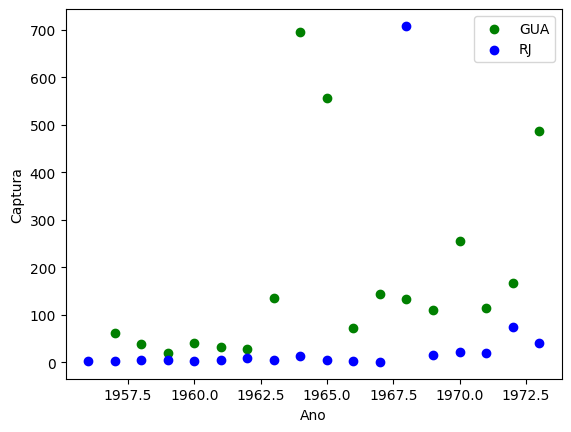

In [5]:
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='GUA')
plt.scatter(x1[:, 0], x1[:, 1], c='b', label='RJ')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

In [6]:
df_x0 = pd.DataFrame(x0, columns=['ano', 'GUA'])
df_x1 = pd.DataFrame(x1, columns=['ano', 'RJ'])
df_x0 = df_x0.drop_duplicates(subset='GUA')
df_x1 = df_x1.drop_duplicates(subset='RJ')

In [7]:
print(df_x0, df_x1)

       ano    GUA
0   1957.0   61.0
1   1958.0   38.0
2   1959.0   19.0
3   1960.0   40.0
4   1961.0   32.0
5   1962.0   28.0
6   1963.0  135.0
7   1964.0  696.0
8   1965.0  556.0
9   1966.0   73.0
10  1967.0  144.0
11  1968.0  134.0
12  1969.0  110.0
13  1970.0  255.0
14  1971.0  114.0
15  1972.0  167.0
16  1973.0  486.0      ano   RJ
0   1956    2
1   1957    3
2   1958    6
3   1959    4
6   1962   10
8   1964   13
11  1967    1
12  1968  708
13  1969   15
14  1970   22
15  1971   19
16  1972   74
17  1973   40


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\Renan\AppData\Local\Temp\ipykernel_20928\2716375405.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_predicted = pd.concat([df_predicted, df_missing_years])


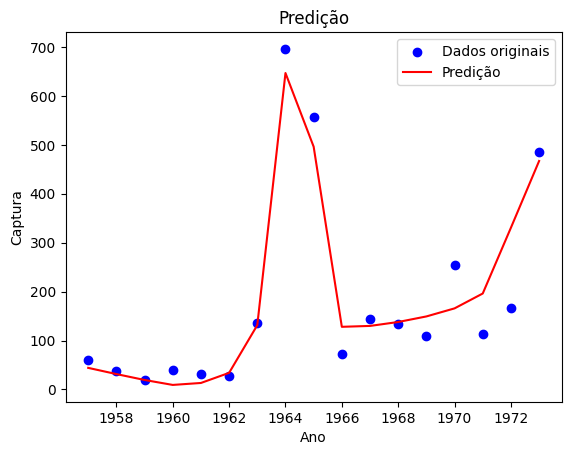

OSError: Cannot save file into a non-existent directory: 'Testes'

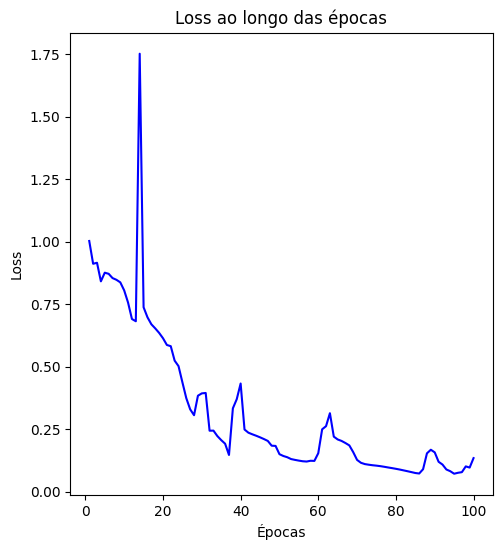

In [11]:
x = np.array(df_x0['ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['GUA'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std


model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
])


opt = tf.keras.optimizers.Nadam(learning_rate=0.01)  


model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])


history = model.fit(x_normalized, y_normalized, epochs=100, verbose=0)


x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)


x_all_normalized = (x_all - x_mean) / x_std


y_all_predicted_normalized = model.predict(x_all_normalized)


y_all_predicted = y_all_predicted_normalized * y_std + y_mean


x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)


x_all_normalized = (x_all - x_mean) / x_std


y_all_predicted_normalized = model.predict(x_all_normalized)


y_all_predicted = y_all_predicted_normalized * y_std + y_mean


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})


df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})


df_missing_years = pd.DataFrame({'Ano': np.setdiff1d(x_all.flatten(), x.flatten()), 'Captura Original': np.nan})


df_predicted = pd.concat([df_predicted, df_missing_years])


df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right')


df_combined = df_combined.sort_values(by='Ano')


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})


df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})



df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right')


df_combined = df_combined.sort_values(by='Ano')



plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()


loss_values = history.history['loss']
accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
df_combined.to_excel('Testes/predicao_GUA.xlsx', index=False)

